In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

Loading and exploring Data

In [2]:
video_games = pd.read_csv(r'c:/Datasets/Video_Game_Sales_as_of_Jan_2017.csv')

In [3]:
video_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [4]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [5]:
video_games= video_games[video_games['Year_of_Release'].notnull()]
video_games= video_games.loc[video_games['Year_of_Release'] < 2017]
video_games['Year_of_Release'] = video_games['Year_of_Release'].astype(int)
video_games['Critic_Score'] = video_games['Critic_Score'] / 10

In [65]:
# create sales dataframe , dropping some rows with null values
sales = video_games.dropna(subset=['Name','Year_of_Release','Genre','Publisher'])

# create ratings dataframe, dropping all rows with null values
scores = video_games.dropna()


In [7]:
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,7.6,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,8.2,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,8.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17403 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17403 non-null  object 
 1   Platform         17403 non-null  object 
 2   Year_of_Release  17403 non-null  int32  
 3   Genre            17403 non-null  object 
 4   Publisher        17403 non-null  object 
 5   NA_Sales         17403 non-null  float64
 6   EU_Sales         17403 non-null  float64
 7   JP_Sales         17403 non-null  float64
 8   Other_Sales      17403 non-null  float64
 9   Global_Sales     17403 non-null  float64
 10  Critic_Score     8335 non-null   float64
 11  Critic_Count     8335 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10250 non-null  object 
dtypes: float64(9), int32(1), object(5)
memory usage: 2.1+ MB


In [9]:
scores.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,7.6,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,8.2,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,8.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,8.9,65.0,8.5,433.0,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,5.8,41.0,6.6,129.0,E


In [10]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 17407
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   int32  
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Global_Sales     7112 non-null   float64
 10  Critic_Score     7112 non-null   float64
 11  Critic_Count     7112 non-null   float64
 12  User_Score       7112 non-null   float64
 13  User_Count       7112 non-null   float64
 14  Rating           7112 non-null   object 
dtypes: float64(9), int32(1), object(5)
memory usage: 861.2+ KB


In [11]:
#Global sales overtime
sales_years = sales.groupby(['Year_of_Release'])[['Global_Sales']].sum()
sales_years.tail()

,Global_Sales
Year_of_Release,
2012,358.07
2013,365.34
2014,338.38
2015,278.27
2016,175.93


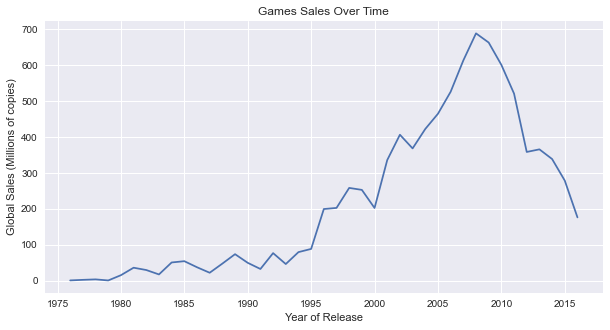

In [12]:
data = sales_years
x_axis = data.index
y_axis = data["Global_Sales"]

plt.figure(figsize = (10,5))
plt.plot(x_axis, y_axis)

plt.xlabel('Year of Release')
plt.ylabel("Global Sales (Millions of copies)")
plt.title('Games Sales Over Time')
plt.show()

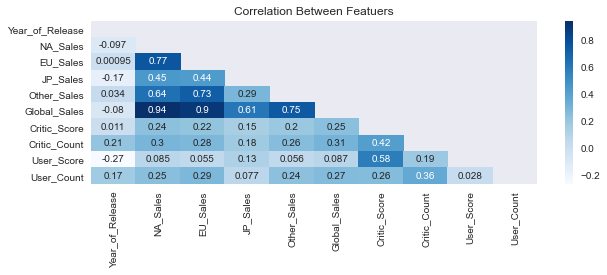

In [13]:
plt.figure(figsize=(10,3))

matrix = np.triu(sales.corr())
sns.heatmap(sales.corr(), cmap='Blues',annot=True, mask=matrix)
plt.title("Correlation Between Featuers")
plt.savefig("heatmap.png")
plt.show()

In [14]:
#Global sales overtime by region
sales_NA = sales.groupby(['Year_of_Release'])[['NA_Sales']].sum()
sales_EU = sales.groupby(['Year_of_Release'])[['EU_Sales']].sum()
sales_JP = sales.groupby(['Year_of_Release'])[['JP_Sales']].sum()

In [15]:
sales_NA.tail()

,NA_Sales
Year_of_Release,
2012,153.88
2013,154.90
2014,135.19
2015,111.76
2016,64.41


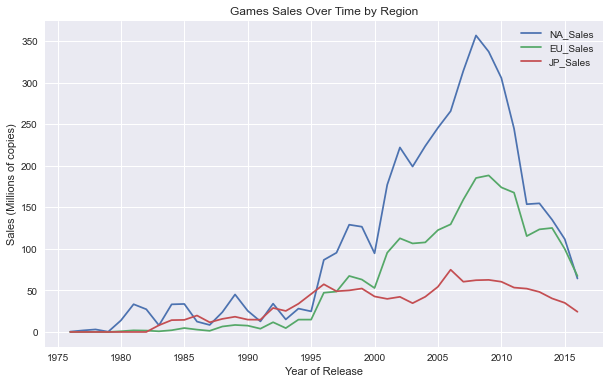

In [16]:
x1 = sales_NA.index
y1 = sales_NA['NA_Sales']

x2 = sales_EU.index
y2 = sales_EU['EU_Sales']

x3 = sales_JP.index
y3 = sales_JP['JP_Sales']

plt.figure(figsize = (10,6))
plt.plot(x1,y1,)
plt.plot(x2,y2)
plt.plot(x3,y3)

plt.legend(['NA_Sales','EU_Sales','JP_Sales'])

plt.xlabel('Year of Release')
plt.ylabel('Sales (Millions of copies)')
plt.title('Games Sales Over Time by Region')

plt.show()

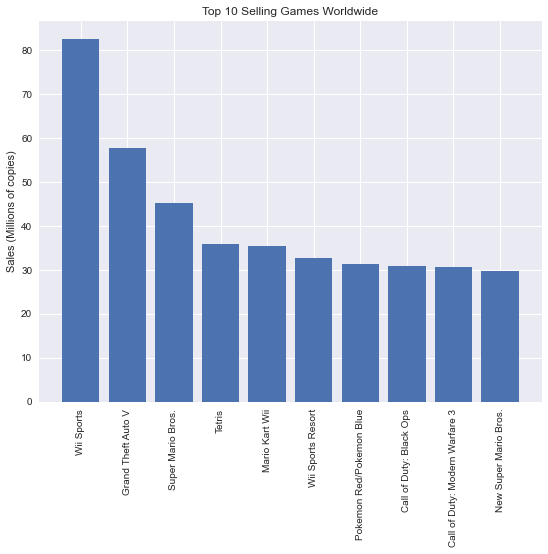

In [17]:
data = sales.groupby(['Name'])[['Global_Sales']].sum()\
.sort_values('Global_Sales', ascending=False).head(10)
x_axis = data.index
y_axis = data["Global_Sales"]

plt.figure(figsize = (9,7))
plt.xticks(rotation = 90)
plt.bar(x_axis, y_axis)

plt.xlabel('')
plt.ylabel('Sales (Millions of copies)')
plt.title('Top 10 Selling Games Worldwide')
plt.show()

In [18]:
#Top selling games by region
top_sales_NA = sales.groupby(['Name'])['NA_Sales'].sum().to_frame().sort_values('NA_Sales', ascending=False).head()
top_sales_EU = sales.groupby(['Name'])['EU_Sales'].sum().to_frame().sort_values('EU_Sales', ascending=False).head()
top_sales_JP = sales.groupby(['Name'])['JP_Sales'].sum().to_frame().sort_values('JP_Sales', ascending=False).head()

In [19]:
top_sales_NA

,NA_Sales
Name,
Wii Sports,41.36
Super Mario Bros.,32.48
Duck Hunt,26.93
Tetris,26.17
Grand Theft Auto V,24.13


In [20]:
top_sales_EU

,EU_Sales
Name,
Wii Sports,28.96
Grand Theft Auto V,24.14
Mario Kart Wii,12.80
FIFA 15,12.05
Call of Duty: Modern Warfare 3,11.17


In [21]:
top_sales_JP

,JP_Sales
Name,
Pokemon Red/Pokemon Blue,10.22
Pokemon Gold/Pokemon Silver,7.20
Super Mario Bros.,6.96
New Super Mario Bros.,6.50
Pokemon Diamond/Pokemon Pearl,6.04


Plotting sales difference between regions

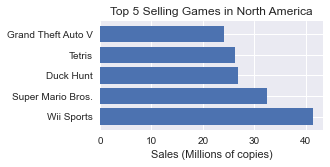

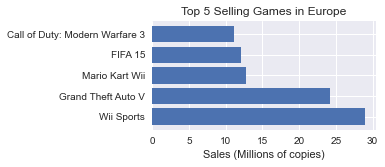

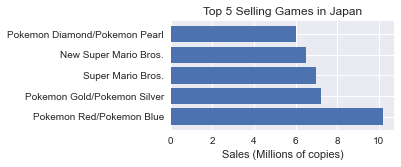

In [22]:
data = top_sales_NA
x_axis = top_sales_NA.index
y_axis = top_sales_NA["NA_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)

plt.xlabel('Sales (Millions of copies)')
plt.ylabel('')
plt.title('Top 5 Selling Games in North America')
plt.show()

data = top_sales_EU
x_axis = top_sales_EU.index
y_axis = top_sales_EU["EU_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)

plt.xlabel('Sales (Millions of copies)')
plt.ylabel('')
plt.title('Top 5 Selling Games in Europe')
plt.show()

data = top_sales_JP
x_axis = top_sales_JP.index
y_axis = top_sales_JP["JP_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)

plt.xlabel('Sales (Millions of copies)')
plt.ylabel('')
plt.title('Top 5 Selling Games in Japan')
plt.show()

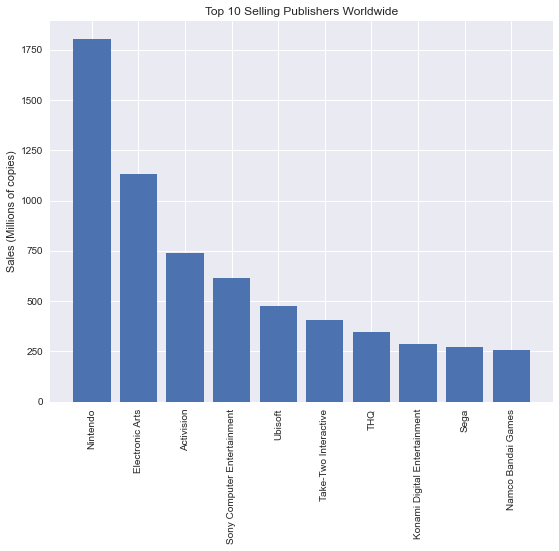

In [23]:
data = sales.groupby(['Publisher'])[['Global_Sales']].sum()\
.sort_values('Global_Sales', ascending=False).head(10)
x_axis = data.index
y_axis = data["Global_Sales"]

plt.figure(figsize = (9,7))
plt.xticks(rotation = 90)
plt.bar(x_axis, y_axis)

plt.xlabel('')
plt.ylabel('Sales (Millions of copies)')
plt.title('Top 10 Selling Publishers Worldwide')
plt.show()

In [24]:
#top publishers by region
publishers_NA = sales.groupby(['Publisher'])[['NA_Sales']].sum().sort_values('NA_Sales',ascending=False).head() 
publishers_EU = sales.groupby(['Publisher'])[['EU_Sales']].sum().sort_values('EU_Sales',ascending=False).head() 
publishers_JP = sales.groupby(['Publisher'])[['JP_Sales']].sum().sort_values('JP_Sales',ascending=False).head()

In [25]:
publishers_NA

,NA_Sales
Publisher,
Nintendo,821.68
Electronic Arts,608.48
Activision,437.65
Sony Computer Entertainment,269.00
Ubisoft,255.13


In [26]:
publishers_EU

,EU_Sales
Publisher,
Nintendo,423.88
Electronic Arts,378.70
Activision,218.62
Sony Computer Entertainment,189.43
Ubisoft,164.48


In [27]:
publishers_JP

,JP_Sales
Publisher,
Nintendo,461.86
Namco Bandai Games,129.27
Konami Digital Entertainment,92.17
Sony Computer Entertainment,74.89
Capcom,68.69


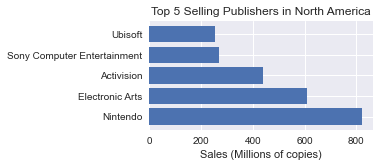

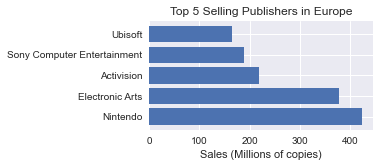

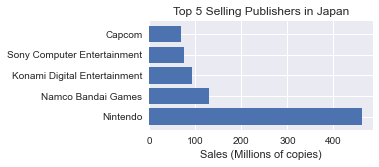

In [28]:
data = publishers_NA
x_axis = data.index
y_axis = data["NA_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)
plt.xlabel('Sales (Millions of copies)')
plt.ylabel('')
plt.title('Top 5 Selling Publishers in North America')
plt.show()

data = publishers_EU
x_axis = data.index
y_axis = data["EU_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)
plt.xlabel('Sales (Millions of copies)')
plt.ylabel('')
plt.title('Top 5 Selling Publishers in Europe')
plt.show()

data = publishers_JP
x_axis = data.index
y_axis = data["JP_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)
plt.xlabel('Sales (Millions of copies)')
plt.ylabel('')
plt.title('Top 5 Selling Publishers in Japan')
plt.show()

In [29]:
#difference between PS4, XOne and PC best sellers
ps4 = sales['Platform'] == 'PS4'
ps4_games_sales = sales[ps4][['Name','Global_Sales']].sort_values('Global_Sales', ascending=False).head()

xone= sales['Platform'] == 'XOne'
xone_games_sales = sales[xone][['Name','Global_Sales']].sort_values('Global_Sales', ascending=False).head()

pc = sales['Platform'] == 'PC'
pc_games_sales = sales[pc][['Name','Global_Sales']].sort_values('Global_Sales', ascending=False).head()

In [30]:
ps4_games_sales

,Name,Global_Sales
30,Call of Duty: Black Ops 3,14.80
37,Grand Theft Auto V,13.36
75,FIFA 17,9.07
79,FIFA 16,8.60
83,Star Wars Battlefront (2015),8.21


In [31]:
xone_games_sales

,Name,Global_Sales
100,Call of Duty: Black Ops 3,7.44
156,Grand Theft Auto V,5.74
183,Call of Duty: Advanced Warfare,5.28
236,Halo 5: Guardians,4.61
258,Fallout 4,4.37


In [32]:
pc_games_sales

,Name,Global_Sales
88,The Sims 3,8.01
138,World of Warcraft,6.31
193,Diablo III,5.17
197,Microsoft Flight Simulator,5.12
220,StarCraft II: Wings of Liberty,4.85


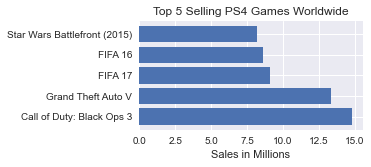

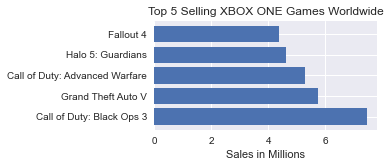

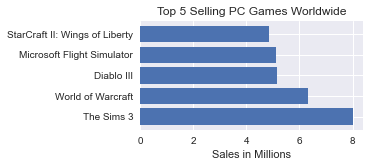

In [33]:
data = ps4_games_sales
x_axis = ps4_games_sales['Name']
y_axis = ps4_games_sales["Global_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)

plt.xlabel('Sales in Millions')
plt.ylabel('')
plt.title('Top 5 Selling PS4 Games Worldwide')
plt.savefig("Top 5 Selling PS4 Games Worldwide.png")
plt.show()

data = xone_games_sales
x_axis = xone_games_sales['Name']
y_axis = xone_games_sales["Global_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)

plt.xlabel('Sales in Millions')
plt.ylabel('')
plt.title('Top 5 Selling XBOX ONE Games Worldwide')
plt.savefig("Top 5 Selling XBOX ONE Games Worldwide.png")
plt.show()

data = pc_games_sales
x_axis = pc_games_sales['Name']
y_axis = pc_games_sales["Global_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)

plt.xlabel('Sales in Millions')
plt.ylabel('')
plt.title('Top 5 Selling PC Games Worldwide')
plt.savefig("Top 5 Selling PC Games Worldwide.png")
plt.show()

In [34]:
sales.groupby(['Platform'])[['Global_Sales']].sum()\
.sort_values('Global_Sales', ascending=False).head()

,Global_Sales
Platform,
PS2,1256.09
X360,975.43
PS3,943.29
Wii,910.14
DS,808.82


In [35]:
sales.groupby(['Platform'])[['Global_Sales']].sum()\
.sort_values('Global_Sales', ascending=False)

,Global_Sales
Platform,
PS2,1256.09
X360,975.43
PS3,943.29
Wii,910.14
DS,808.82
PS,730.71
PS4,340.75
GBA,318.72
PSP,295.67


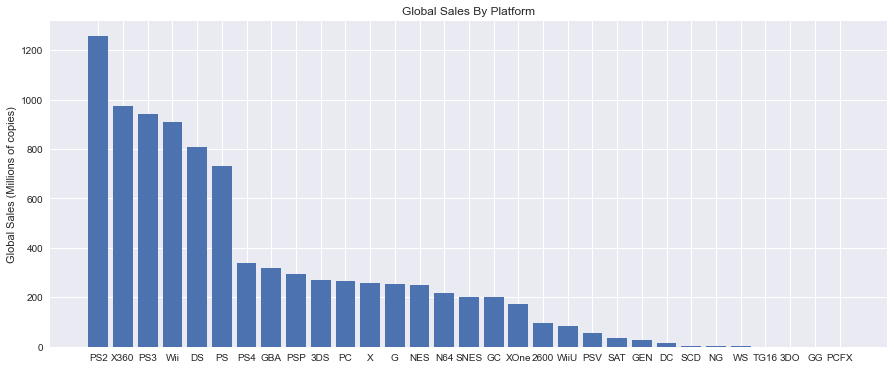

In [36]:
data=sales.groupby(['Platform'])[['Global_Sales']].sum()\
.sort_values('Global_Sales', ascending=False)

x_axis = data.index
y_axis = data['Global_Sales']

plt.figure(figsize = (15,6))
plt.bar(x_axis, y_axis)
plt.xlabel('')
plt.ylabel('Global Sales (Millions of copies)')
plt.title('Global Sales By Platform')
plt.show()

In [37]:
top_platforms_NA = sales.groupby(['Platform'])[['NA_Sales']].sum().sort_values('NA_Sales', ascending=False).head()
top_platforms_EU = sales.groupby(['Platform'])[['EU_Sales']].sum().sort_values('EU_Sales', ascending=False).head()
top_platforms_JP = sales.groupby(['Platform'])[['JP_Sales']].sum().sort_values('JP_Sales', ascending=False).head()

In [38]:
top_platforms_NA

,NA_Sales
Platform,
X360,604.51
PS2,583.84
Wii,497.74
PS3,394.78
DS,383.24


In [39]:
top_platforms_EU

,EU_Sales
Platform,
PS2,339.29
PS3,331.66
X360,272.00
Wii,263.15
PS,213.61


In [40]:
top_platforms_JP

,JP_Sales
Platform,
DS,176.11
PS,139.83
PS2,139.62
SNES,116.55
3DS,103.29


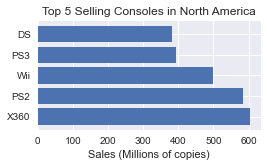

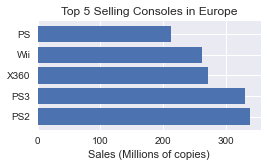

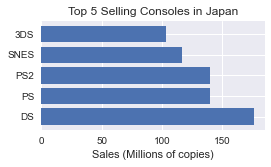

In [41]:
data = top_platforms_NA
x_axis = top_platforms_NA.index
y_axis = top_platforms_NA["NA_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)

plt.xlabel('Sales (Millions of copies)')
plt.ylabel('')
plt.title('Top 5 Selling Consoles in North America')
plt.show()

data = top_platforms_EU
x_axis = top_platforms_EU.index
y_axis = top_platforms_EU["EU_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)

plt.xlabel('Sales (Millions of copies)')
plt.ylabel('')
plt.title('Top 5 Selling Consoles in Europe')
plt.show()

data = top_platforms_JP
x_axis = top_platforms_JP.index
y_axis = top_platforms_JP["JP_Sales"]

plt.figure(figsize = (4,2))
plt.barh(x_axis, y_axis)

plt.xlabel('Sales (Millions of copies)')
plt.ylabel('')
plt.title('Top 5 Selling Consoles in Japan')
plt.show()

In [42]:
#Difference between users and critics score
scores.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,7.6,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,8.2,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,8.0,73.0,8.0,193.0,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,8.9,65.0,8.5,433.0,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,5.8,41.0,6.6,129.0,E


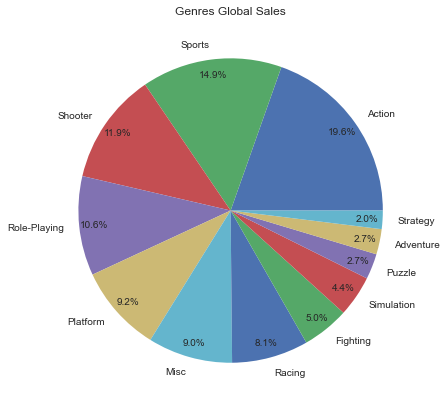

In [47]:
sales.groupby(['Genre'])[['Global_Sales']].sum()\
.sort_values('Global_Sales', ascending=False).plot.pie(x='Platform', y='Global_Sales'\
            ,autopct='%1.1f%%',pctdistance=0.9\
            ,title= 'Genres Global Sales',figsize = (9,7)\
            ,legend=None, ylabel='')

plt.savefig("Genres Global Sales.png")
plt.show()

           

In [48]:
top_genres_worldwide = sales.groupby(['Genre'])[['Global_Sales']].sum().sort_values('Global_Sales', ascending=False).head()
top_genres_worldwide

,Global_Sales
Genre,
Action,1761.86
Sports,1340.99
Shooter,1067.28
Role-Playing,949.25
Platform,831.74


In [49]:
sales.groupby(['Genre'])[['Global_Sales']].sum()\
.sort_values(['Global_Sales'], ascending=False).head()

,Global_Sales
Genre,
Action,1761.86
Sports,1340.99
Shooter,1067.28
Role-Playing,949.25
Platform,831.74


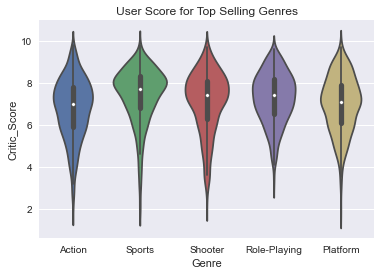

In [50]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Genre', y='Critic_Score', data=scores, order=['Action','Sports','Shooter','Role-Playing','Platform'])
plt.title('User Score for Top Selling Genres')
plt.savefig("User Score for Top Selling Genres.png")

plt.show()

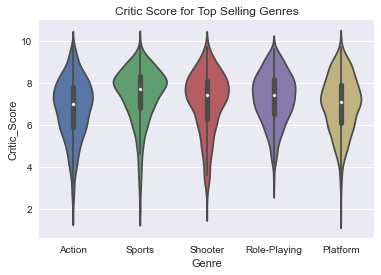

In [51]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Genre', y='Critic_Score', data=scores\
               , order=['Action','Sports','Shooter','Role-Playing','Platform'])
plt.title('Critic Score for Top Selling Genres')
plt.show()

In [52]:
scores.groupby(['Genre'])[['Critic_Score']].mean().sort_values('Critic_Score', ascending=False).head(3)

,Critic_Score
Genre,
Sports,7.403262
Role-Playing,7.271583
Strategy,7.254110


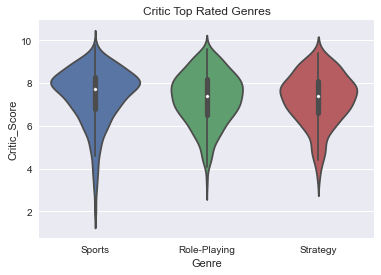

In [53]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Genre', y='Critic_Score', data=scores\
               , order=['Sports','Role-Playing','Strategy'])
plt.title('Critic Top Rated Genres')
plt.show()

In [54]:
scores.groupby(['Genre'])[['User_Score']].mean().sort_values('User_Score', ascending=False).head(3)

,User_Score
Genre,
Role-Playing,7.599323
Platform,7.348544
Strategy,7.317123


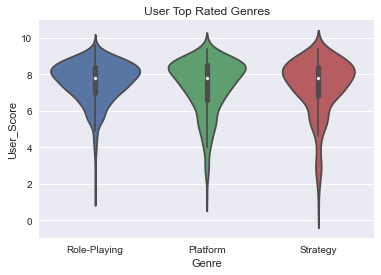

In [64]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Genre', y='User_Score', data=scores\
               , order=['Role-Playing','Platform','Strategy'])
plt.title('User Top Rated Genres')
plt.show()